<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [26]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [28]:
## Write your code here
print('Columns: \n', df.columns)
print('\nData types: \n', df.dtypes)
print('\nSummary: ')
df.info()

Columns: 
 Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data types: 
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [29]:
## Write your code here
print("df Shape: ", df.shape)

df.dropna(axis=0, how='all')
print("df Shape after dropna: ", df.shape)
print(df.isna().sum())

df = df.apply(lambda col: col.fillna(col.median()) if col.dtype in ['float64','int64'] else col.fillna(col.mode()[0]))
df.isnull().sum()

df Shape:  (65437, 114)
df Shape after dropna:  (65437, 114)
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [30]:
## Write your code here
for column in df.columns:
    print(df[column].value_counts().reset_index(), '\n')

       ResponseId  count
0           65437      1
1               1      1
2               2      1
3               3      1
4               4      1
...           ...    ...
65432          33      1
65433          34      1
65434          35      1
65435          36      1
65436          37      1

[65437 rows x 2 columns] 

                                          MainBranch  count
0                     I am a developer by profession  50207
1  I am not primarily a developer, but I write co...   6511
2                              I am learning to code   3875
3                        I code primarily as a hobby   3334
4  I used to be a developer by profession, but no...   1510 

                  Age  count
0     25-34 years old  23911
1     35-44 years old  14942
2     18-24 years old  14098
3     45-54 years old   6249
4     55-64 years old   2575
5  Under 18 years old   2568
6   65 years or older    772
7   Prefer not to say    322 

                                            Emp

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


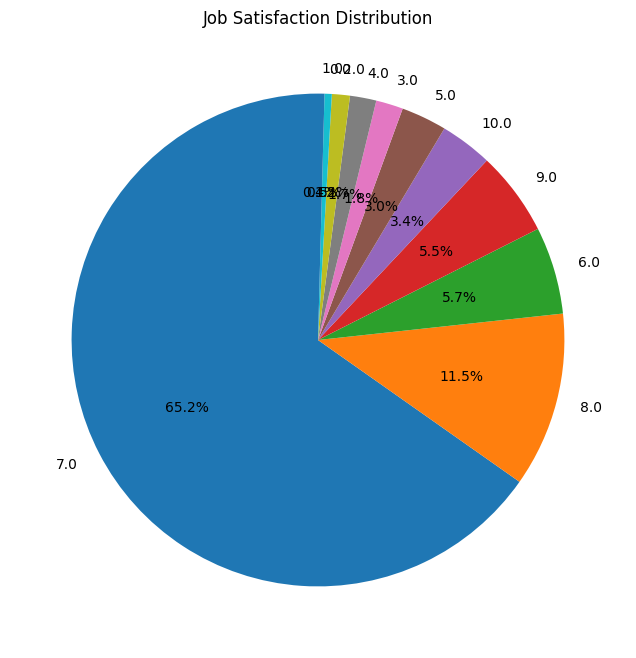

In [31]:
## Write your code here
df_cleaned = df.dropna(subset=['JobSat'])
# df_cleaned['JobSat'].isna().sum()

JobSat_counts = df['JobSat'].value_counts()

# Plotting a pie chart to show the proportion of each JobSat category
plt.figure(figsize=(8, 8))
JobSat_counts.plot.pie(autopct='%1.1f%%', startangle=90)

plt.title("Job Satisfaction Distribution")
plt.ylabel('')  
plt.show()

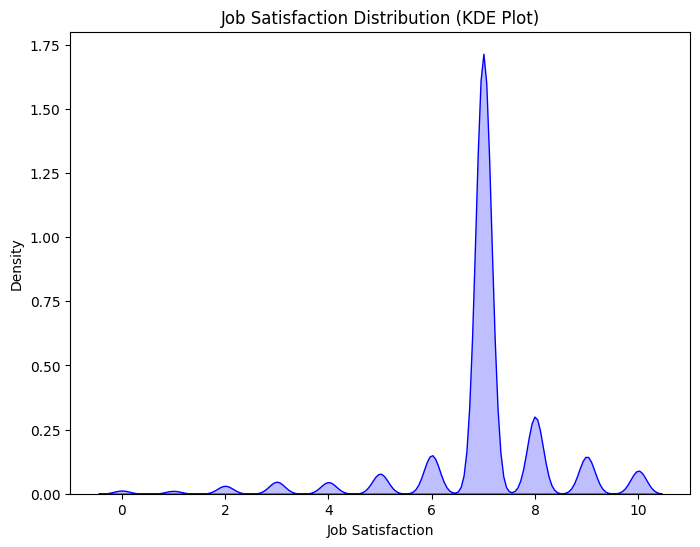

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['JobSat'], fill=True, color='blue')
plt.title("Job Satisfaction Distribution (KDE Plot)")
plt.xlabel("Job Satisfaction")
plt.ylabel("Density")
plt.show()

##### Highest number of job satisfaction level is 7.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [33]:
## Write your code here
LanguageHaveWorkedWith = df.dropna(subset='LanguageHaveWorkedWith').reset_index(names='Count')
LanguageWantToWorkWith = df.dropna(subset='LanguageWantToWorkWith').reset_index(names='Count')

print("Language Have Worked With:----------------------------------------------------------------\n", LanguageHaveWorkedWith['LanguageHaveWorkedWith'].value_counts())
print("\nLanguage Want To Work With:---------------------------------------------------------------\n", LanguageWantToWorkWith['LanguageWantToWorkWith'].value_counts())
LanguageHaveWorkedWith.shape, LanguageWantToWorkWith.shape

Language Have Worked With:----------------------------------------------------------------
 LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                    6694
Python                                                                             832
HTML/CSS;JavaScript;PHP;SQL                                                        503
C#                                                                                 452
HTML/CSS;JavaScript                                                                452
                                                                                  ... 
Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript                         1
C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript                                     1
C;HTML/CSS;JavaScript;MATLAB;PHP;Python;TypeScript                                   1
C;Dart;Delphi;Java;Kotlin;Objective-C;PHP;SQL                                        1
Bash/Shell (all

((65437, 115), (65437, 115))

In [ ]:
pd.merge(LanguageHaveWorkedWith, LanguageWantToWorkWith, how='outer', left_on='LanguageHaveWorkedWith', right_on='LanguageWantToWorkWith')

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


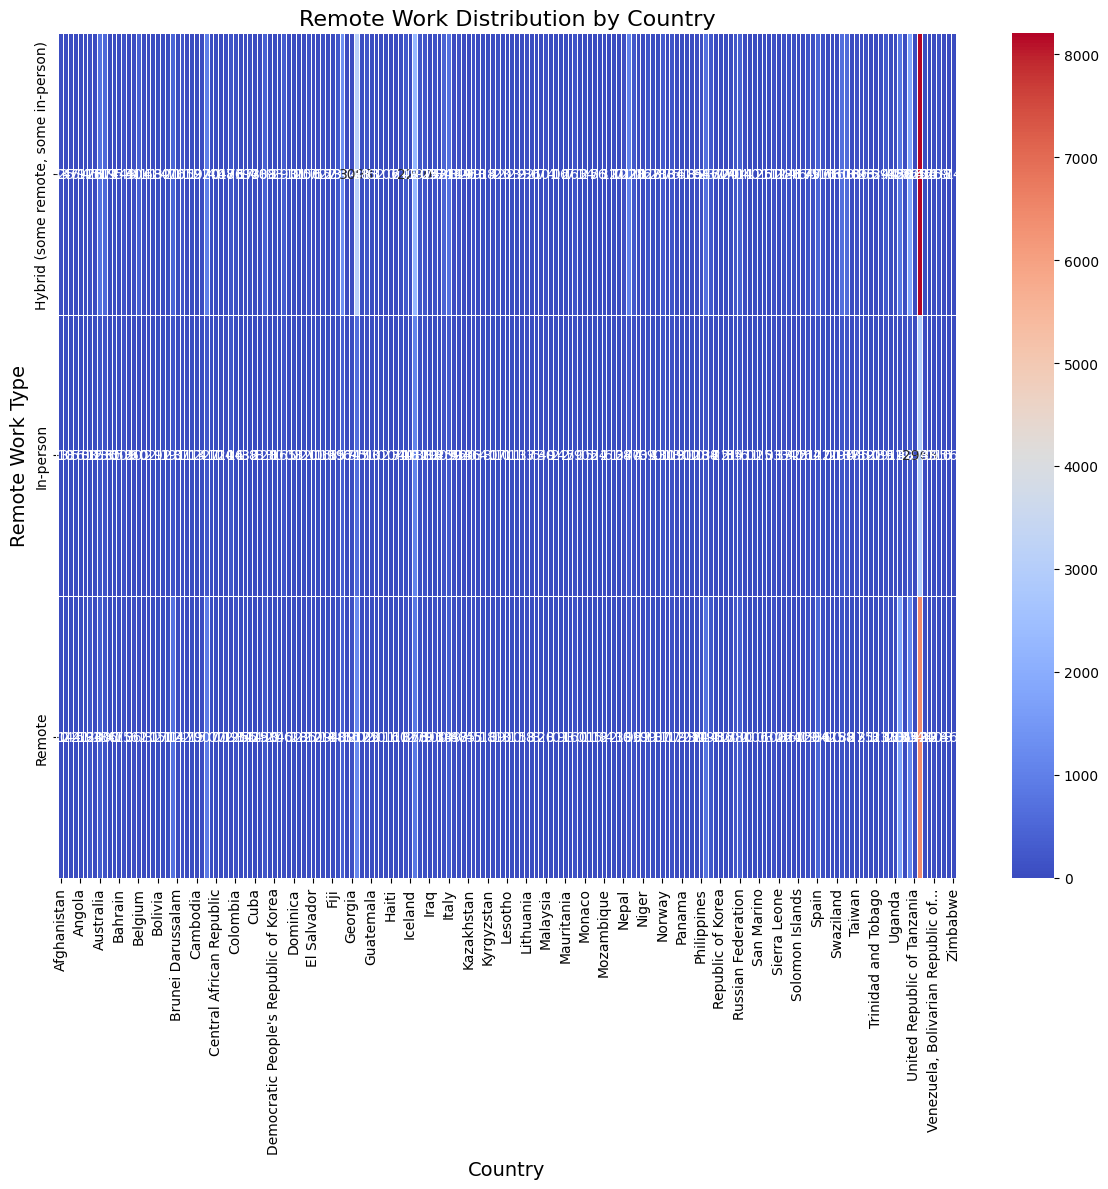

In [34]:
## Write your code here
RemoteWork_by_region = df.groupby(['RemoteWork', 'Country']).size().reset_index(name='Count')
pivot_df = RemoteWork_by_region.pivot_table(index='Country', columns='RemoteWork', values='Count', fill_value=0)

plt.figure(figsize=(12, 12))
sns.heatmap(pivot_df.T, annot=True, cmap='coolwarm', fmt='g', cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Remote Work Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Remote Work Type', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

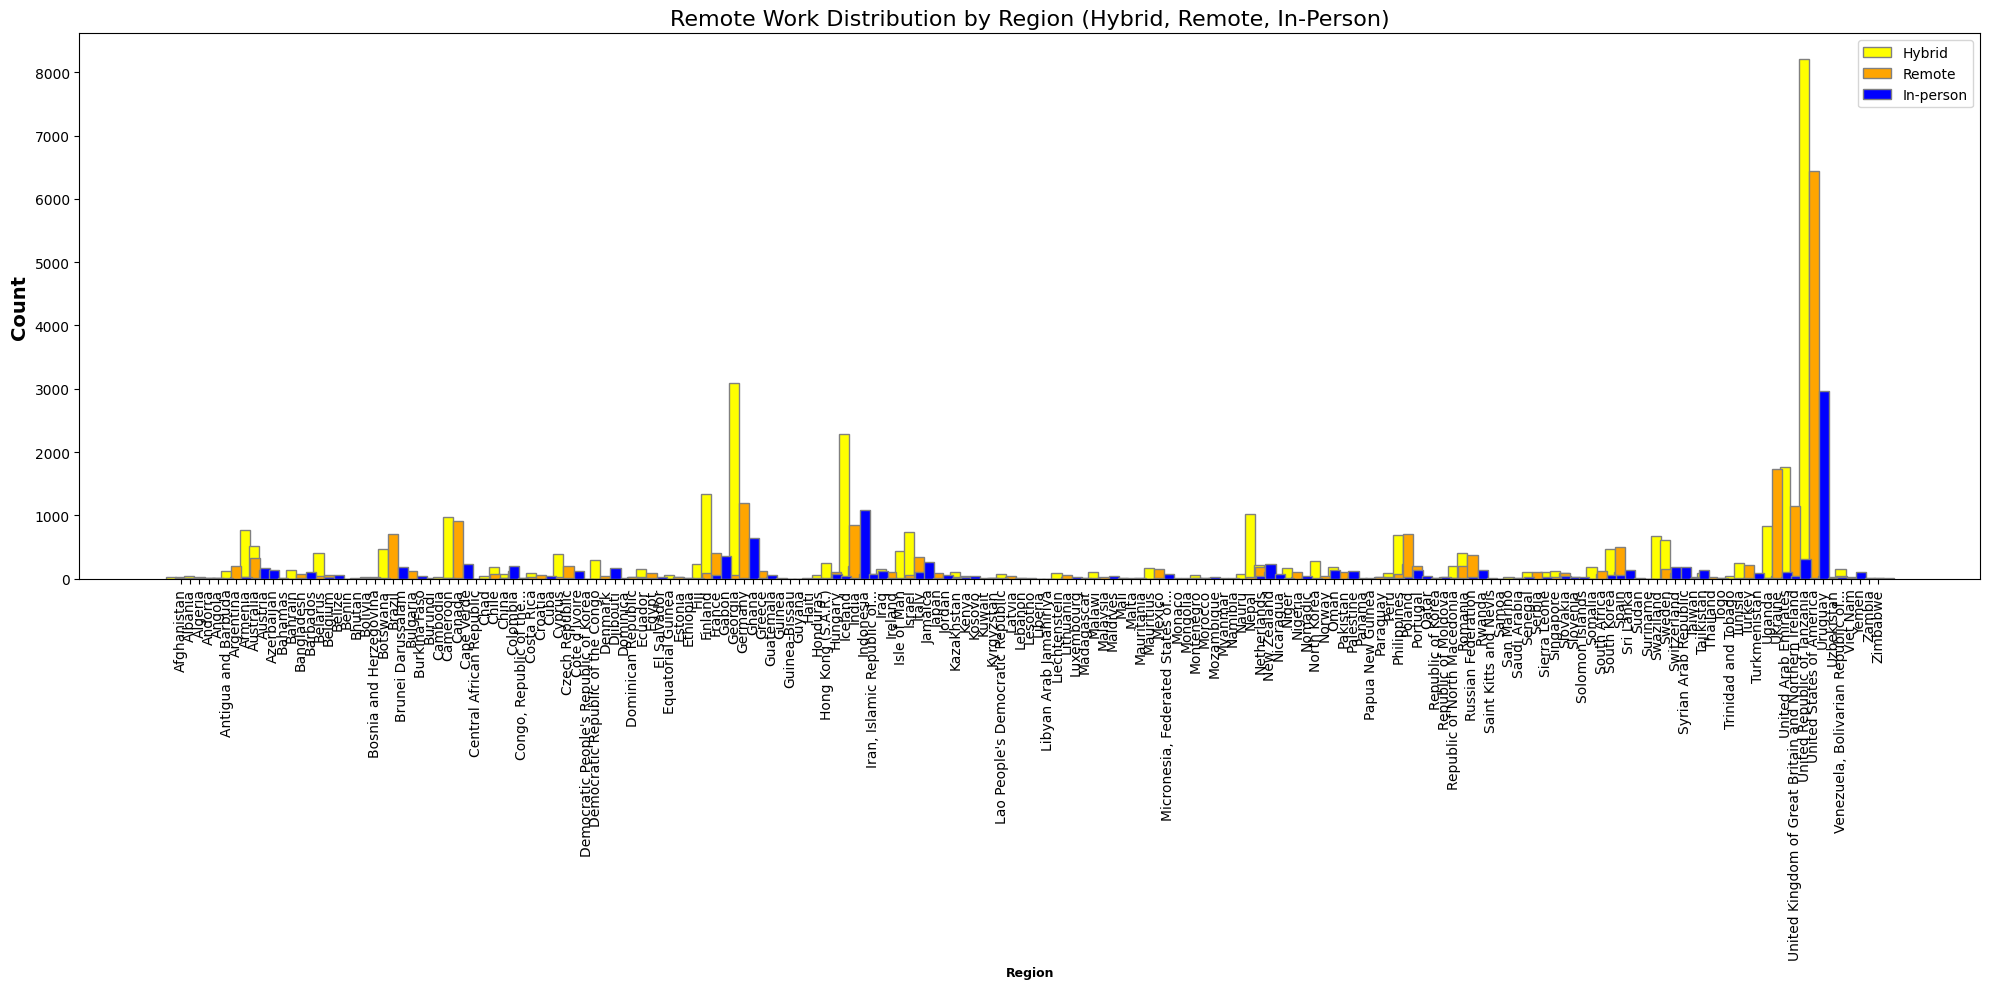

In [35]:
barwidth = 1.1
r1 = range(len(pivot_df))
r2 = [x+barwidth for x in r1]
r3 = [x+barwidth for x in r2]

plt.figure(figsize=(20, 10))
plt.bar(r1, pivot_df['Hybrid (some remote, some in-person)'], color='yellow', width=barwidth, edgecolor='grey', label='Hybrid')
plt.bar(r2, pivot_df['Remote'], color='orange', width=barwidth, edgecolor='grey', label='Remote')
plt.bar(r3, pivot_df['In-person'], color='blue', width=barwidth, edgecolor='grey', label='In-person')

plt.xlabel('Region', fontweight='bold', fontsize=9)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks([r + barwidth for r in range(len(pivot_df))], pivot_df.index, rotation=90)
plt.title('Remote Work Distribution by Region (Hybrid, Remote, In-Person)', fontsize=16)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


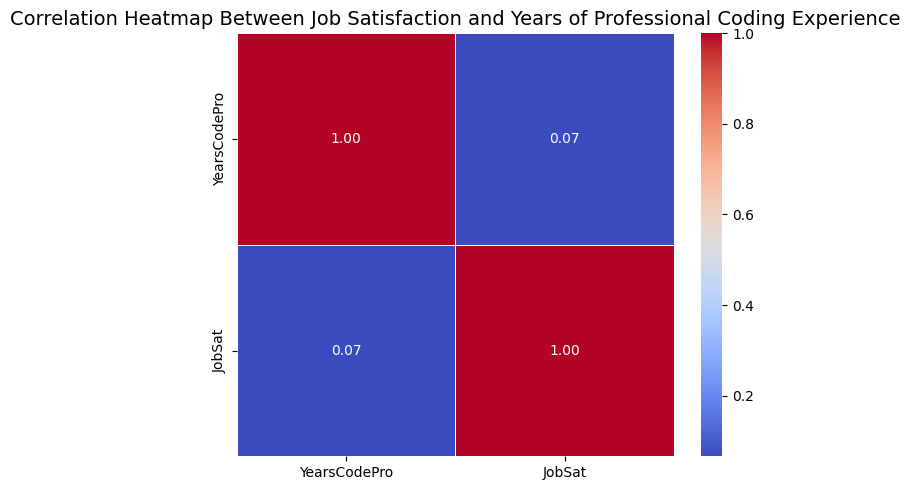

np.float64(0.06590629623626808)

In [36]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 1)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 50)

df1 = df[['YearsCodePro', 'JobSat']]
correlation_matrix = df1.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap Between Job Satisfaction and Years of Professional Coding Experience', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()
df['JobSat'].corr(df['YearsCodePro'])

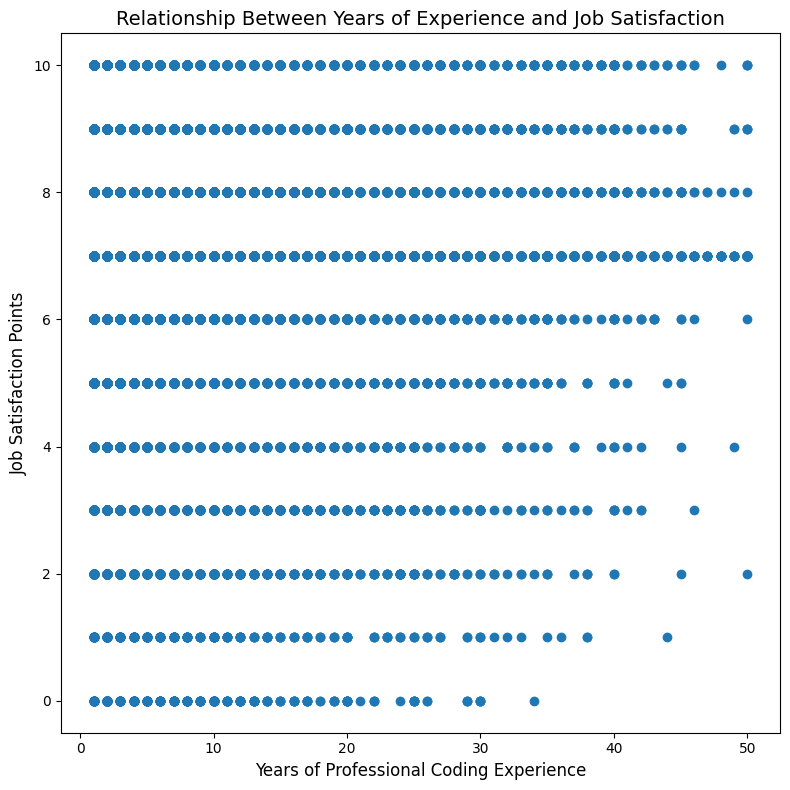

In [37]:
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')  # Converts to NaN for non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.figure(figsize=(8,8))
plt.scatter(df['YearsCodePro'], df['JobSat'])
plt.title('Relationship Between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)

plt.tight_layout()
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


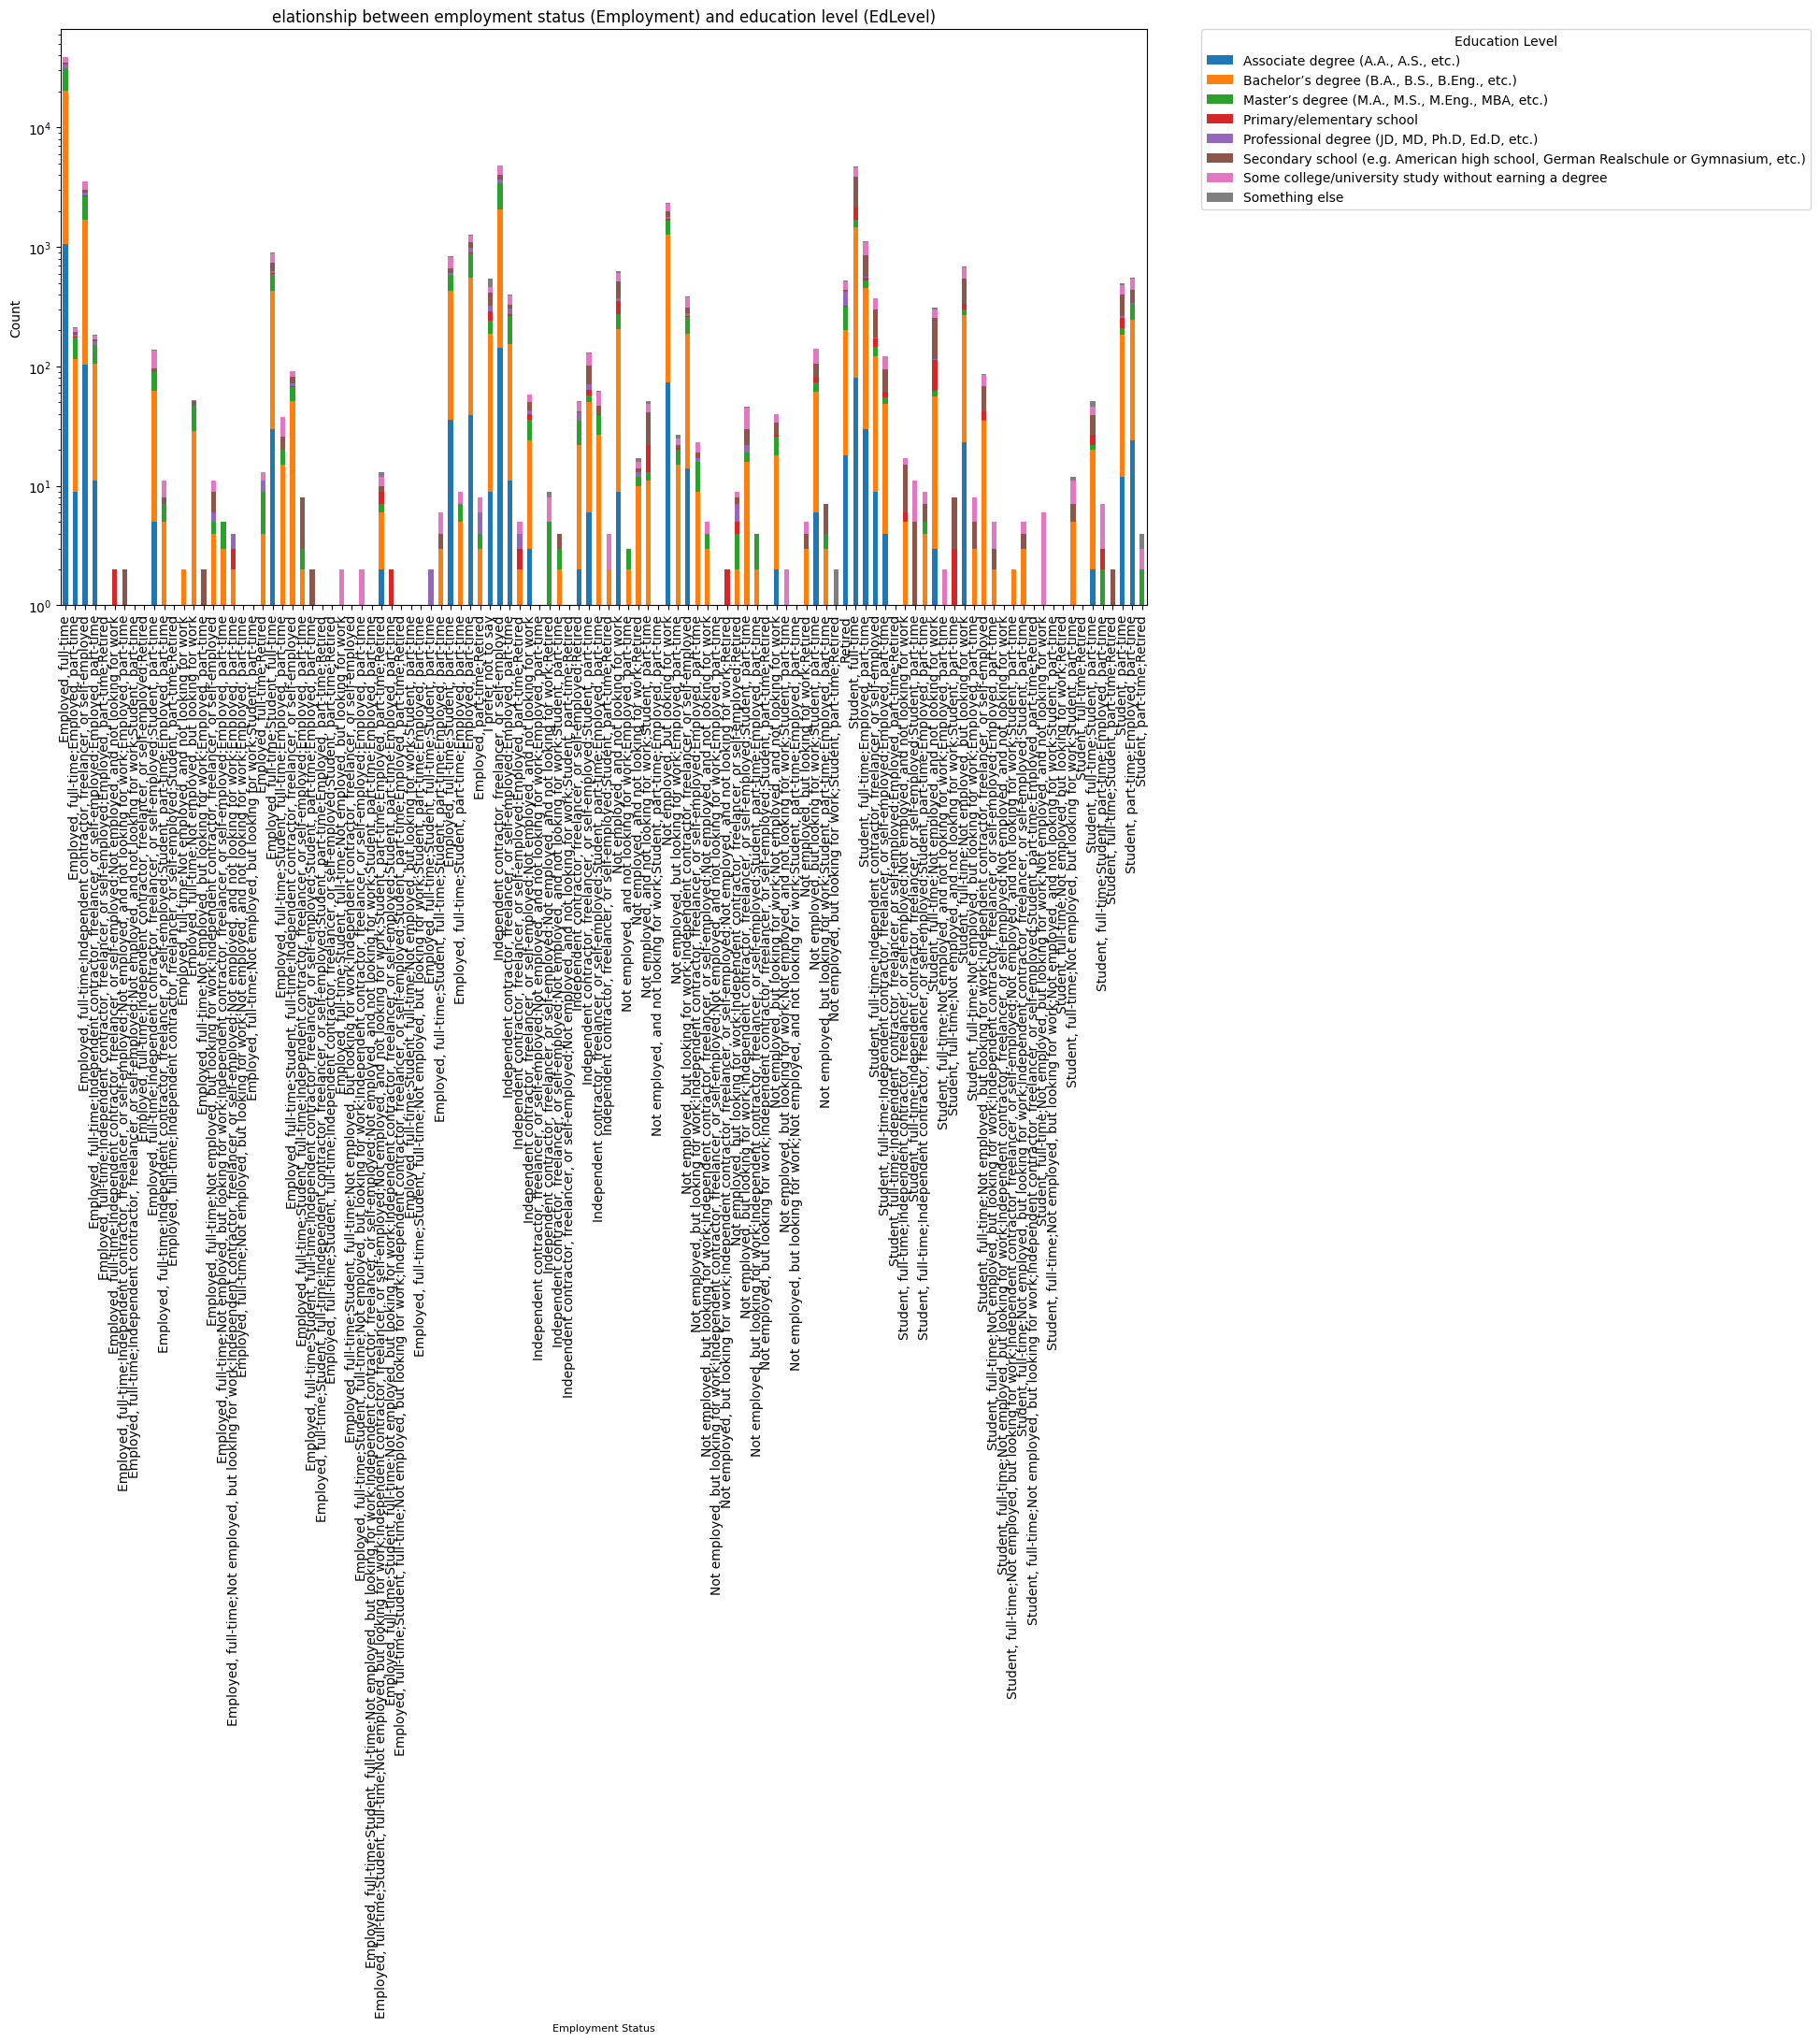

In [38]:
## Write your code here
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])

cross_tab.plot(kind='bar', stacked=True, figsize=(15,8))
plt.yscale('log')

plt.title("elationship between employment status (Employment) and education level (EdLevel)")
plt.xlabel("Employment Status", fontsize=8)
plt.ylabel("Count")

plt.legend(title='Education Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [39]:
## Write your code here
df.to_csv("cleaned_data", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
